In [7]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [2]:
#dot 3 for 5 values of p

In [3]:
#TASK1
def q_voter(G: nx.Graph,p: float,q: int,steps: int):
    #SETTING UP RANDOM OPINIONS ON THE NETWORK
    op_up=[n for n in G.nodes()]
    states_up={node:1 for node in op_up}
    
    nx.set_node_attributes(G,states_up,"state")
    
    mags=[1] #magnetization
    for step in range(steps):
        for i in range(len(G)):
            S_i=random.sample(G.nodes,1)[0]
            
            x=np.random.uniform()
            
            if x<p:#if agent is acting independantly
                y=np.random.uniform()
                if y<0.5:#1/2 chance he changes his opinion on his own
                    if G.nodes[S_i]['state']==1:
                        G.nodes[S_i]['state']=-1
                    elif G.nodes[S_i]['state']==-1:
                        G.nodes[S_i]['state']=1
            else:
                #changing the state based on unanimous decision
                neighbors=[i for i in nx.neighbors(G,S_i)]
                if len(neighbors)>=q:
                    q_panel=random.sample(neighbors, q)
                    panel_opinion=[G.nodes[n]['state'] for n in q_panel]
                    if np.abs(sum(panel_opinion))==q:
                        #print(G.nodes[q_panel[0]]['state'])
                        G.nodes[S_i]['state']=G.nodes[q_panel[0]]['state']

        general_opinion=[G.nodes[n]['state'] for n in G.nodes()]
        
        mags.append(sum(general_opinion)/len(general_opinion))
    return mags

In [15]:
#TASK2
A = nx.complete_graph(100)
B = nx.barabasi_albert_graph(100,4)
C = nx.watts_strogatz_graph(100,4,0.01, seed = 420)
D = nx.watts_strogatz_graph(100,4,0.02, seed = 420) 

MC_steps = 1000
qs = [3,4]
ps = np.arange(0,0.51,0.02)
graphs=[A,B,C,D]

df1=pd.DataFrame()

for i in range(len(graphs)):
    for q in qs:
        for p in ps:
            df1[f'{i}_{q}_{p}']=q_voter(graphs[i],q,p,MC_steps)



In [16]:
df1 #each simulation is denoted as ind_q_p, where ind is the index of the graph from the list graphs

,0_3_0.0,0_3_0.02,0_3_0.04,0_3_0.06,0_3_0.08,0_3_0.1,0_3_0.12,0_3_0.14,0_3_0.16,0_3_0.18,...,3_4_0.32,3_4_0.34,3_4_0.36,3_4_0.38,3_4_0.4,3_4_0.42,3_4_0.44,3_4_0.46,3_4_0.48,3_4_0.5
0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
1,0.50,0.48,0.48,0.46,0.36,0.40,0.42,0.14,0.36,0.38,...,0.32,0.26,0.42,0.30,0.30,0.40,0.36,0.36,0.26,0.50
2,0.08,0.22,0.08,0.12,0.16,0.30,0.20,0.02,0.20,0.16,...,0.08,0.16,0.14,0.04,0.12,0.20,0.20,0.12,0.00,0.20
3,0.18,-0.04,0.02,0.02,0.10,0.14,0.04,-0.14,0.12,0.12,...,0.04,0.16,-0.08,0.06,0.00,0.02,-0.16,0.04,0.14,0.06
4,0.04,0.04,0.00,-0.10,-0.06,0.00,0.04,-0.16,-0.08,-0.10,...,-0.18,0.00,0.04,0.16,0.04,0.00,-0.22,-0.12,0.04,-0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,-0.14,-0.10,-0.16,0.20,0.02,0.12,-0.12,0.10,0.12,0.24,...,-0.02,0.00,-0.10,0.00,0.20,0.08,-0.06,0.02,0.26,0.00
997,-0.02,-0.02,-0.04,0.08,0.06,-0.04,-0.02,0.22,0.00,0.12,...,0.08,0.12,-0.06,-0.06,0.16,0.02,-0.02,-0.02,0.16,-0.02
998,0.00,-0.02,-0.02,-0.04,0.18,0.00,0.02,0.28,0.00,0.06,...,-0.02,0.02,-0.02,0.00,0.10,0.08,-0.02,-0.10,0.16,-0.02
999,-0.04,0.08,0.14,-0.08,0.22,0.00,0.10,0.06,-0.22,-0.08,...,0.00,-0.14,-0.04,0.08,0.22,-0.10,-0.14,0.10,0.14,-0.10


In [ ]:
#TASK3

In [31]:
ps1=np.arange(0,0.51,0.1)

df2=pd.DataFrame()

for g in range(len(graphs)):
    for q in qs:
        for p in ps1:
            z=[]
            for sim in range(50):
                x=q_voter(graphs[g],q,p,MC_steps)
                y=np.array([np.abs(i)/50 for i in x])
                z.append(y)
            df2[f'{g}_{q}_{p}']=sum(z)




In [32]:
df2

,0_3_0.0,0_3_0.1,0_3_0.2,0_3_0.30000000000000004,0_3_0.4,0_3_0.5,0_4_0.0,0_4_0.1,0_4_0.2,0_4_0.30000000000000004,...,3_3_0.2,3_3_0.30000000000000004,3_3_0.4,3_3_0.5,3_4_0.0,3_4_0.1,3_4_0.2,3_4_0.30000000000000004,3_4_0.4,3_4_0.5
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.3908,0.3748,0.3612,0.3880,0.3728,0.3704,0.3732,0.3640,0.3592,0.3680,...,0.3628,0.3668,0.3524,0.3656,0.3584,0.3676,0.3636,0.3628,0.3580,0.3720
2,0.1520,0.1632,0.1268,0.1368,0.1456,0.1392,0.1236,0.1296,0.1376,0.1520,...,0.1484,0.1364,0.1588,0.1552,0.1224,0.1320,0.1296,0.1292,0.1604,0.1492
3,0.0992,0.0748,0.0904,0.0960,0.0764,0.0872,0.0756,0.0964,0.0840,0.0992,...,0.0836,0.0956,0.0964,0.0980,0.0828,0.0716,0.0884,0.0828,0.0852,0.0800
4,0.0904,0.0948,0.0680,0.0644,0.0920,0.0756,0.0744,0.0804,0.0920,0.0928,...,0.0728,0.0708,0.1048,0.1072,0.0632,0.0872,0.0844,0.0700,0.0884,0.0800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.0808,0.0952,0.0732,0.0916,0.0744,0.0740,0.0792,0.0824,0.0956,0.0776,...,0.0668,0.0868,0.0956,0.0744,0.0800,0.0888,0.0736,0.0808,0.0848,0.0728
997,0.0800,0.0788,0.0752,0.1076,0.0824,0.0764,0.0740,0.0824,0.0836,0.0780,...,0.0836,0.0752,0.0776,0.0740,0.0692,0.0756,0.0824,0.0696,0.0776,0.0756
998,0.0652,0.0988,0.0656,0.0824,0.0832,0.0848,0.0652,0.0716,0.0764,0.0788,...,0.0976,0.0840,0.0800,0.0764,0.0752,0.0956,0.0812,0.0728,0.0856,0.0768
999,0.0820,0.0752,0.0672,0.0752,0.0768,0.0796,0.0544,0.0764,0.0756,0.0780,...,0.0748,0.0740,0.0748,0.0948,0.0900,0.0864,0.0852,0.0804,0.0792,0.0672


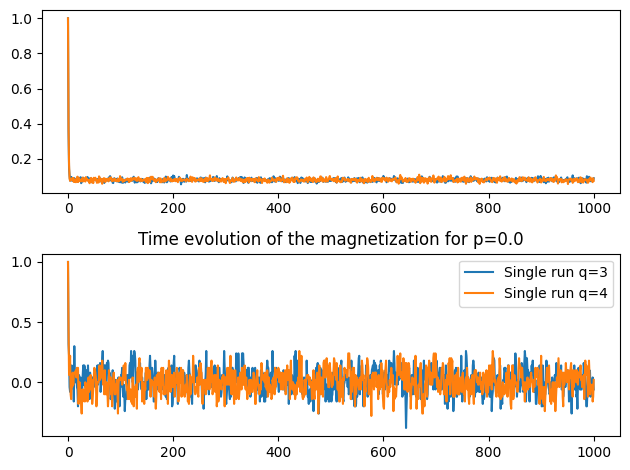

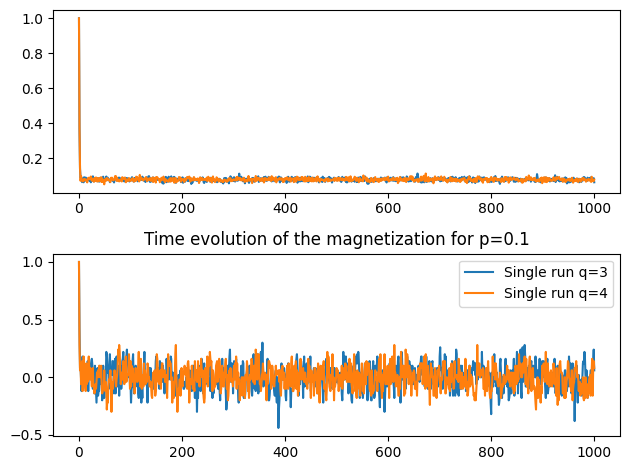

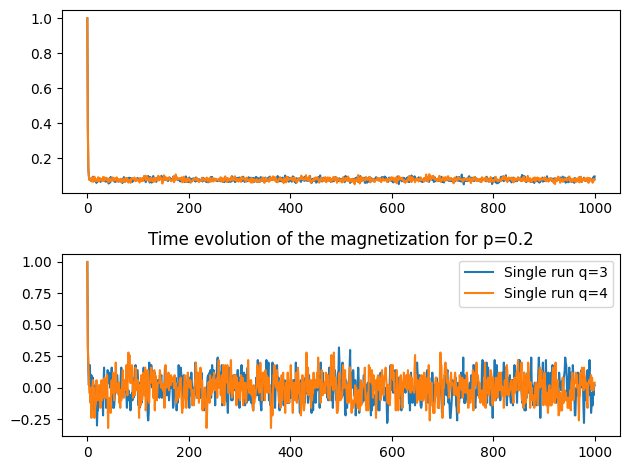

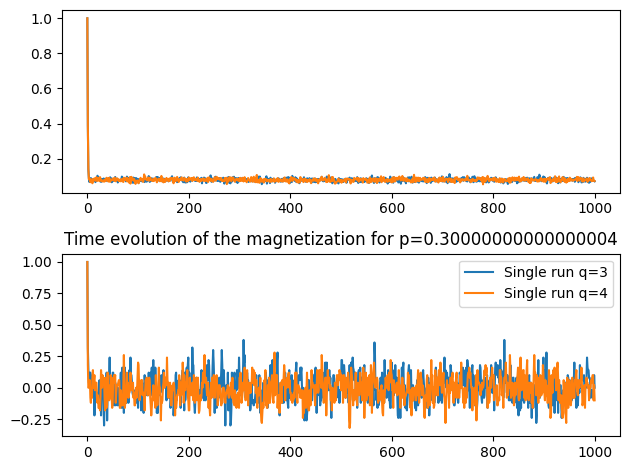

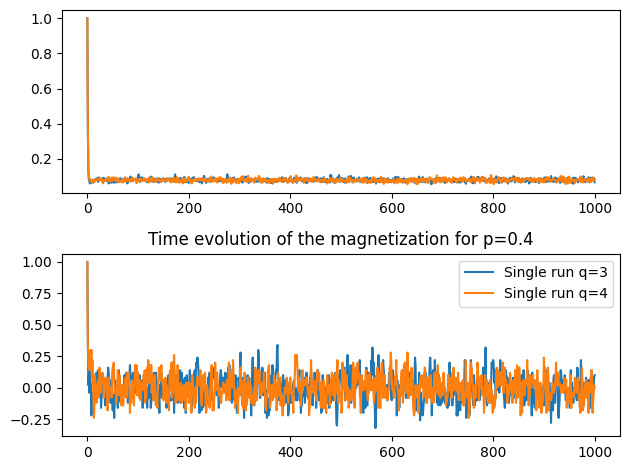

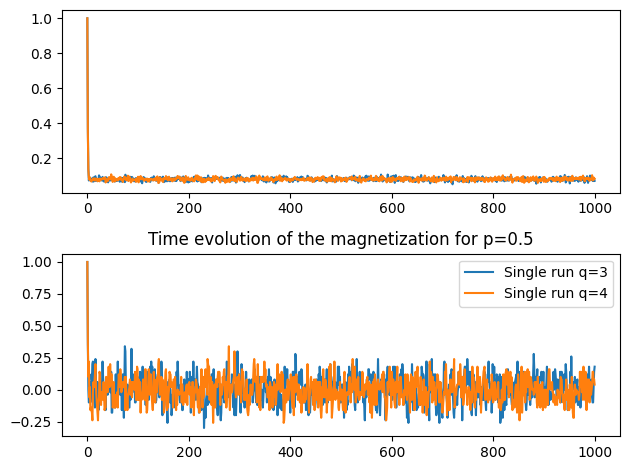

In [35]:
#task4

for p in ps1:
    for q in qs:
            run=q_voter(C,q,p,MC_steps)
            y=np.array([np.abs(i) for i in run])
            plt.subplot(2, 1, 1)     
            plt.plot(df2[f'2_{q}_{p}'],label=f"Average q={q}")
            plt.subplot(2, 1, 2)
            plt.plot(run,label=f"Single run q={q}")
    plt.title( f"Time evolution of the magnetization for p={p}")
    plt.tight_layout()
    plt.legend()
    plt.show()
        


In [42]:
#task5
#for q=3
vals_A=[df2[f"0_3_{p}"].iat[-1] for p in ps1]
vals_B=[df2[f"1_3_{p}"].iat[-1] for p in ps1]
vals_C=[df2[f"2_3_{p}"].iat[-1] for p in ps1]
vals_D=[df2[f"3_3_{p}"].iat[-1] for p in ps1]

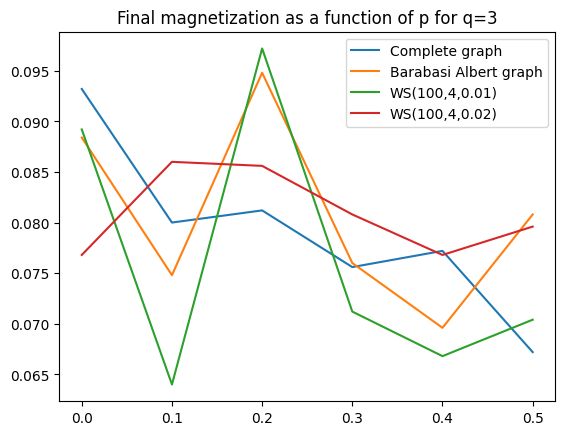

In [45]:
plt.plot(ps1,vals_A,label="Complete graph")
plt.plot(ps1,vals_B,label="Barabasi Albert graph")
plt.plot(ps1,vals_C,label="WS(100,4,0.01)")
plt.plot(ps1,vals_D,label="WS(100,4,0.02)")
plt.title('Final magnetization as a function of p for q=3')
plt.legend()
plt.show()

In [46]:
#for q=4
vals1_A=[df2[f"0_4_{p}"].iat[-1] for p in ps1]
vals1_B=[df2[f"1_4_{p}"].iat[-1] for p in ps1]
vals1_C=[df2[f"2_4_{p}"].iat[-1] for p in ps1]
vals1_D=[df2[f"3_4_{p}"].iat[-1] for p in ps1]

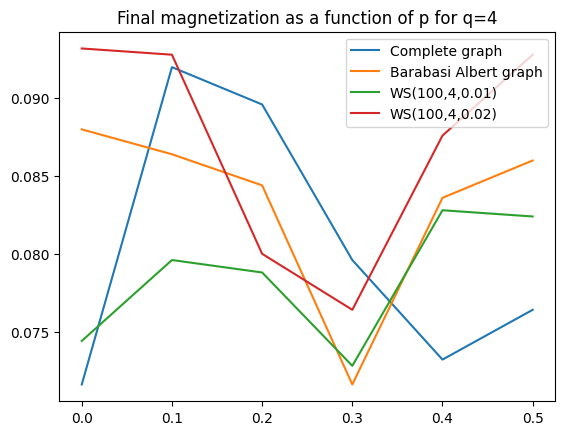

In [47]:
plt.plot(ps1,vals1_A,label="Complete graph")
plt.plot(ps1,vals1_B,label="Barabasi Albert graph")
plt.plot(ps1,vals1_C,label="WS(100,4,0.01)")
plt.plot(ps1,vals1_D,label="WS(100,4,0.02)")
plt.title('Final magnetization as a function of p for q=4')
plt.legend()
plt.show()

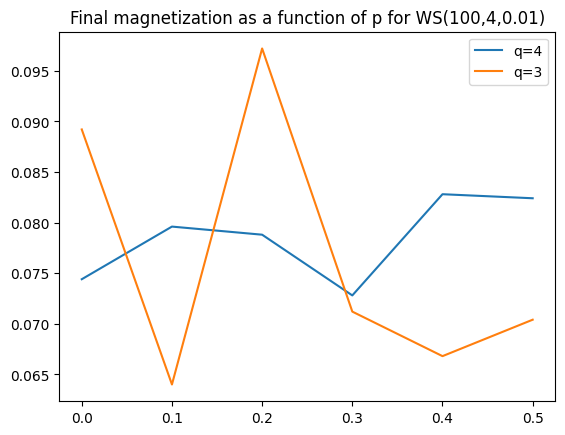

In [49]:
plt.plot(ps1,vals1_C,label="q=4")
plt.plot(ps1,vals_C,label="q=3")
plt.title("Final magnetization as a function of p for WS(100,4,0.01)")
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2be72a1a-6ede-4702-bb85-1f84486961ea' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>